In [1]:
%autosave 0


Autosave disabled


# Acquire & Prepare -- Wrangle Notebook

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

#custom module; (testing wrangle)
import wrangle as w

In [3]:
# # below is the python code used to combine the csv files.
# #=========================================================

# # Read the first CSV file into a DataFrame
# df1 = pd.read_csv('winequality-red.csv')
# df2 = pd.read_csv('winequality-white.csv')
# # Concatenated the two df
# combined_df = pd.concat([df1, df2])
# # Saved combined df to a new CSV file
# combined_df.to_csv('combined_file.csv', index=False)
# #=========================================================

- I have combined the csv files required and will now use the winequality_red_white.csv

In [4]:
# def acquire_wine():

#     filename = 'winequality_red_white.csv'
    
#     if os.path.isfile(filename):
        
#         return pd.read_csv(filename)

#         return df

In [5]:
df = w.acquire_wine()

In [6]:
# function is operational; quick view of data

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# no nulls noted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
df.shape

(6497, 12)

In [10]:
#looking at statistical count for all features. yo 14% alcohol, where it at?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [11]:
df.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8   

In [12]:
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [13]:
df.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality']

In [14]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# need to clean up; functionize prepare (clean)
# def clean_wine():
#     # retrieve wine df
#     df = acquire_wine()
#      df.columns = [col.lower().replace(' ','_') for col in df.columns]
#     return df

## checking the distribution of the Data

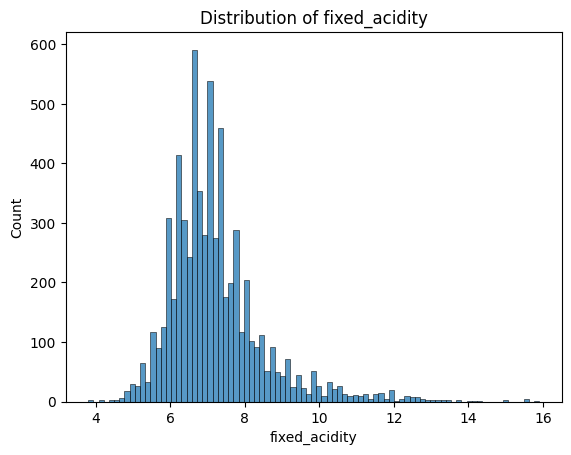

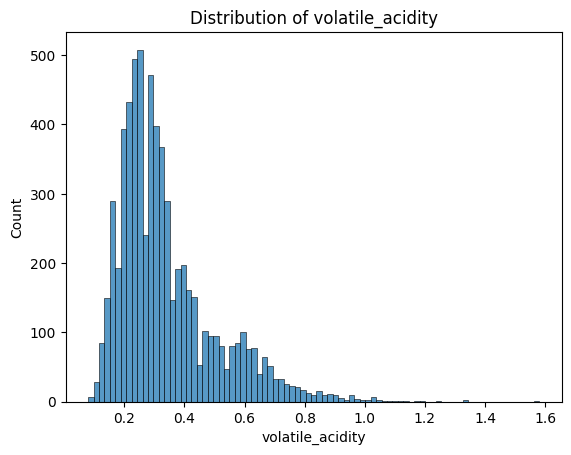

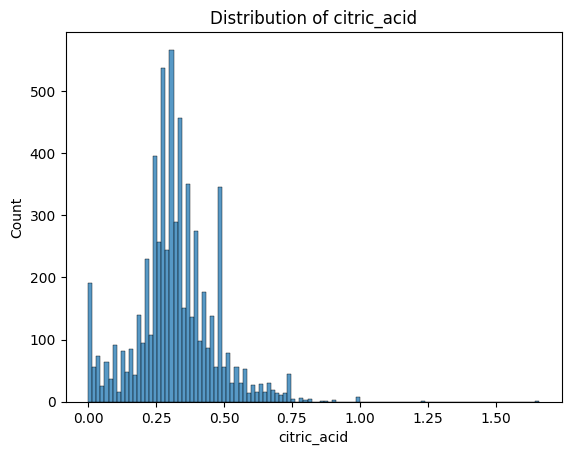

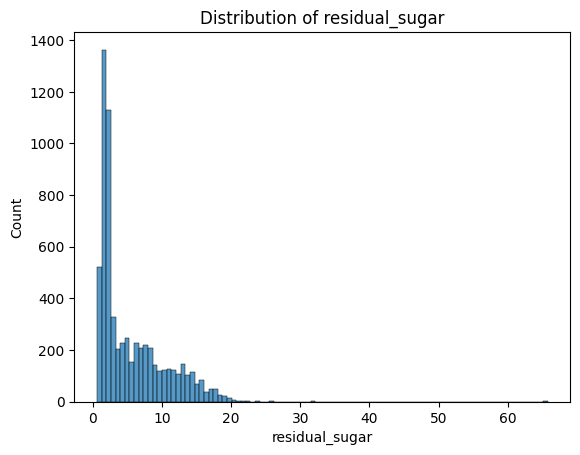

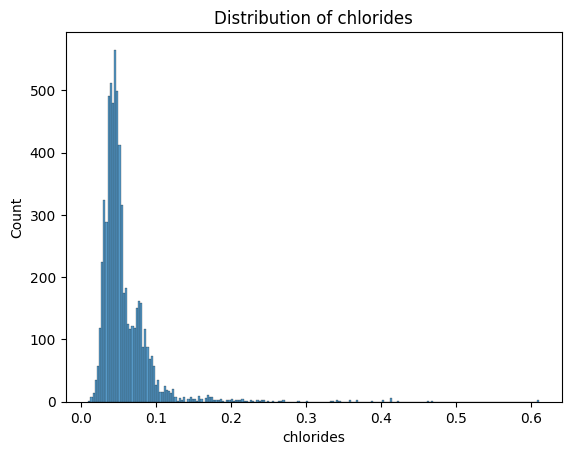

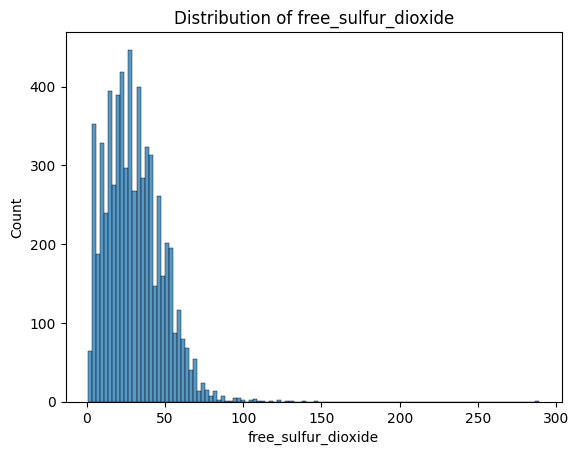

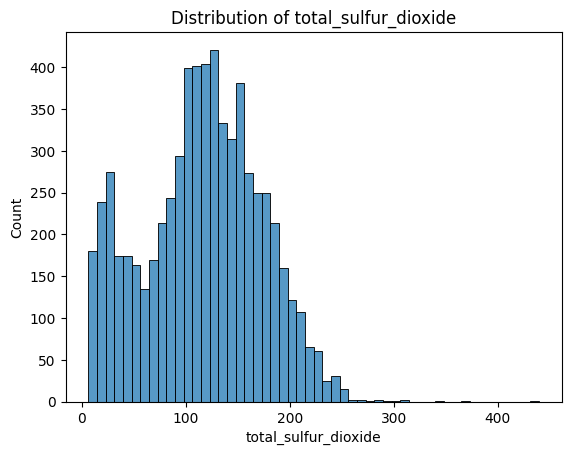

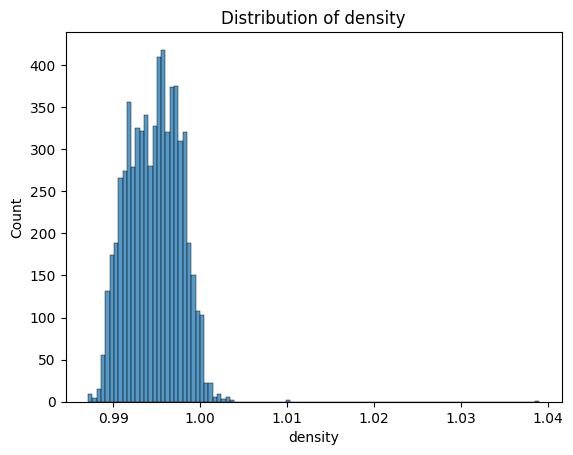

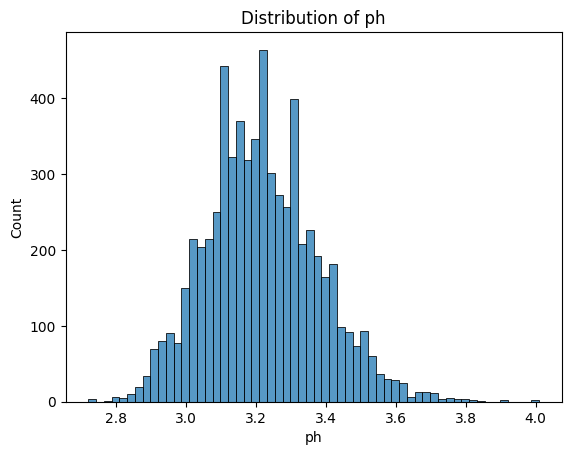

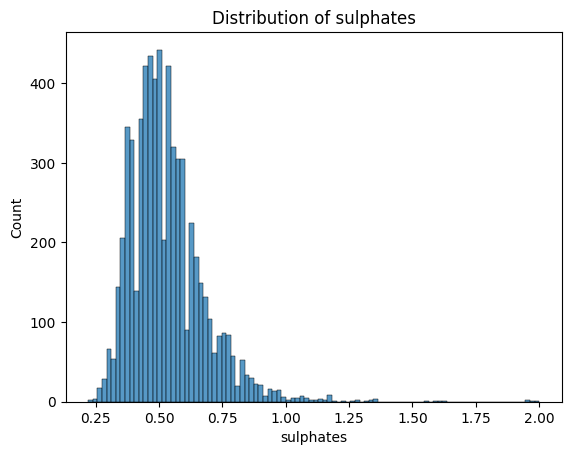

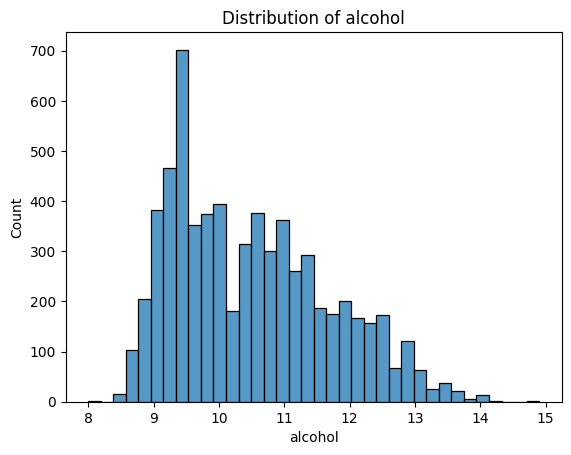

In [16]:
for col in df.columns[df.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

- **The data is completely composed of numerical data. The distributions show alot of right skewed (right tailed) visualizations and we can deduce there are alot of outliers in our features.**

- calculate the **IQR** for all our columns.

In [17]:
def identify_outliers(col, k=1.5):
    
    q1, q3 = col.quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    lower_fence = q1 - iqr * k
    upper_fence = q3 + iqr * k
    
    return np.where((col < lower_fence) | (col > upper_fence), 1, 0)

- The function identifies outliers

In [18]:
for col in df.columns[df.dtypes == 'float64']:
    
    df[f'{col}_outliers'] = identify_outliers(df[col])
    
df.head()  

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,volatile_acidity_outliers,citric_acid_outliers,residual_sugar_outliers,chlorides_outliers,free_sulfur_dioxide_outliers,total_sulfur_dioxide_outliers,density_outliers,ph_outliers,sulphates_outliers,alcohol_outliers
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,1,1,0,0,0,0,0,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1,1,0,0,0,0,0,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,1,0,0,0,0,0,0,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0,0,0,0,0,0,0,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,1,1,0,0,0,0,0,0,0,0


In [19]:
df.mean(numeric_only=True)


fixed_acidity                      7.215307
volatile_acidity                   0.339666
citric_acid                        0.318633
residual_sugar                     5.443235
chlorides                          0.056034
free_sulfur_dioxide               30.525319
total_sulfur_dioxide             115.744574
density                            0.994697
ph                                 3.218501
sulphates                          0.531268
alcohol                           10.491801
quality                            5.818378
fixed_acidity_outliers             0.054948
volatile_acidity_outliers          0.058027
citric_acid_outliers               0.078344
residual_sugar_outliers            0.018162
chlorides_outliers                 0.044020
free_sulfur_dioxide_outliers       0.009543
total_sulfur_dioxide_outliers      0.001539
density_outliers                   0.000462
ph_outliers                        0.011236
sulphates_outliers                 0.029398
alcohol_outliers                

In [20]:
def train_val_test(df, target=None, seed = 42):

    train, val_test = train_test_split(df, train_size = 0.7,
                                       random_state = seed,
                                       stratify = target)
    
    val, test = train_test_split(val_test, train_size = 0.5,
                                 random_state = seed,
                                 stratify = target)
    
    return train, val, test

In [21]:
train, val, test = w.train_val_test(df)
train.shape, val.shape, test.shape

((4547, 23), (975, 23), (975, 23))

In [22]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,volatile_acidity_outliers,citric_acid_outliers,residual_sugar_outliers,chlorides_outliers,free_sulfur_dioxide_outliers,total_sulfur_dioxide_outliers,density_outliers,ph_outliers,sulphates_outliers,alcohol_outliers
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,...,0,0,0,0,0,0,0,1,0,0
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,...,0,0,0,0,0,0,0,0,0,0
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,...,0,0,0,0,0,0,0,0,0,0
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,...,0,0,0,0,0,0,0,0,0,0
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,...,0,1,0,0,0,1,0,0,0,0


In [23]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'fixed_acidity_outliers',
 'volatile_acidity_outliers',
 'citric_acid_outliers',
 'residual_sugar_outliers',
 'chlorides_outliers',
 'free_sulfur_dioxide_outliers',
 'total_sulfur_dioxide_outliers',
 'density_outliers',
 'ph_outliers',
 'sulphates_outliers',
 'alcohol_outliers']

* **Scaling data on all features including outliers**

In [24]:
def scale_data(train, val, test, scaler):

    # make copies for scaling
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    columns_to_scale = ['fixed_acidity',
                         'volatile_acidity',
                         'citric_acid',
                         'residual_sugar',
                         'chlorides',
                         'free_sulfur_dioxide',
                         'total_sulfur_dioxide',
                         'density',
                         'ph',
                         'sulphates',
                         'alcohol',
                         'quality',
                         'fixed_acidity_outliers',
                         'volatile_acidity_outliers',
                         'citric_acid_outliers',
                         'residual_sugar_outliers',
                         'chlorides_outliers',
                         'free_sulfur_dioxide_outliers',
                         'total_sulfur_dioxide_outliers',
                         'density_outliers',
                         'ph_outliers',
                         'sulphates_outliers',
                         'alcohol_outliers'
    ]
    
    # Fit the scaler on the training data for all of the columns
    scaler.fit(train[columns_to_scale])
    
    # Transform the data for each split
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    val_scaled[columns_to_scale] = scaler.transform(val[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

    scaled_col = [train_scaled, val_scaled, test_scaled]
    
    return train_scaled, val_scaled, test_scaled

In [25]:
mms = MinMaxScaler()
train_scaled, val_scaled, test_scaled = w.scale_data(train, val, test, mms)

In [26]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,volatile_acidity_outliers,citric_acid_outliers,residual_sugar_outliers,chlorides_outliers,free_sulfur_dioxide_outliers,total_sulfur_dioxide_outliers,density_outliers,ph_outliers,sulphates_outliers,alcohol_outliers
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,...,0,0,0,0,0,0,0,1,0,0
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,...,0,0,0,0,0,0,0,0,0,0
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,...,0,0,0,0,0,0,0,0,0,0
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,...,0,0,0,0,0,0,0,0,0,0
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,...,0,1,0,0,0,1,0,0,0,0


##  Distribution of Train subset scaled and included outliers of features which were included in the scaling.

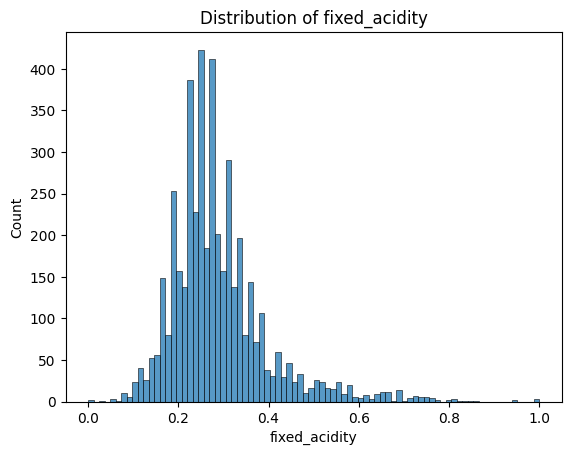

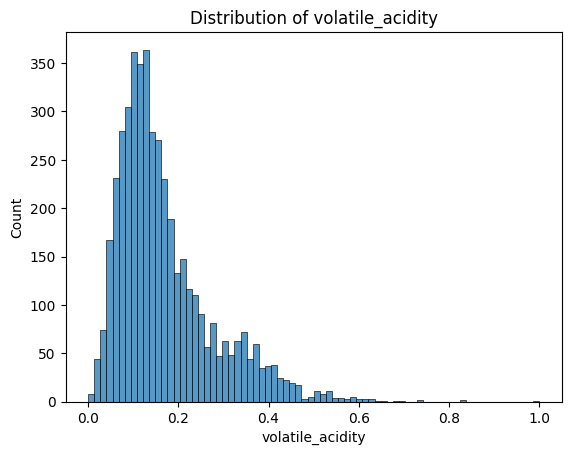

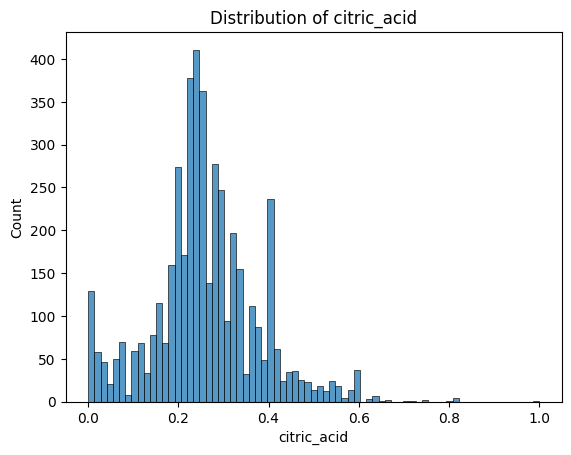

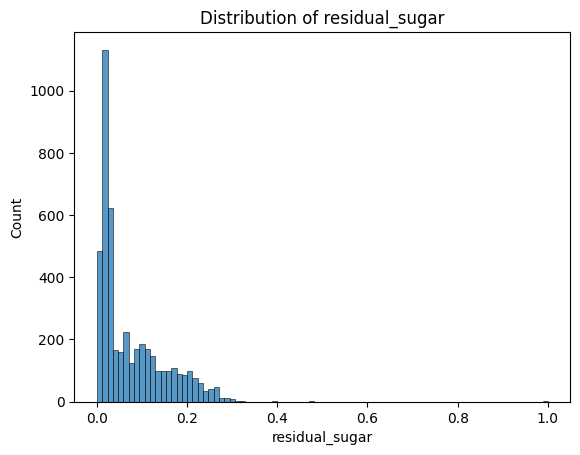

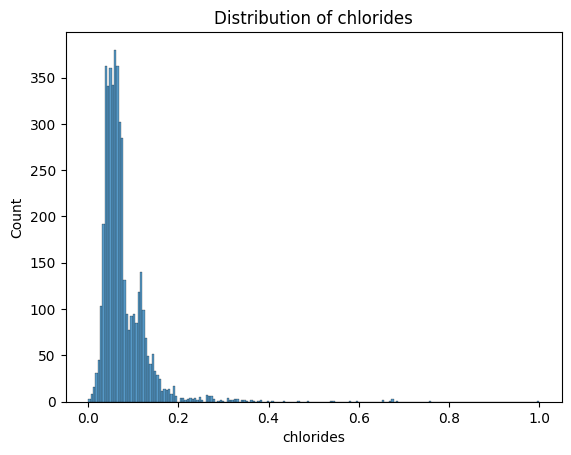

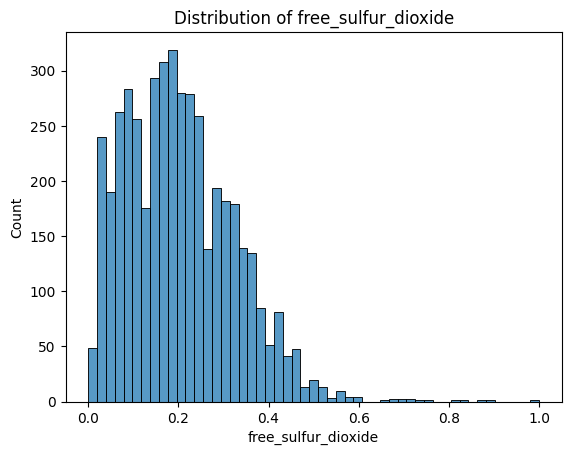

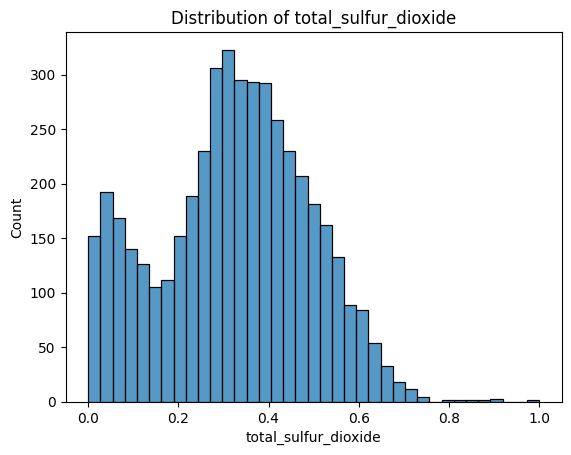

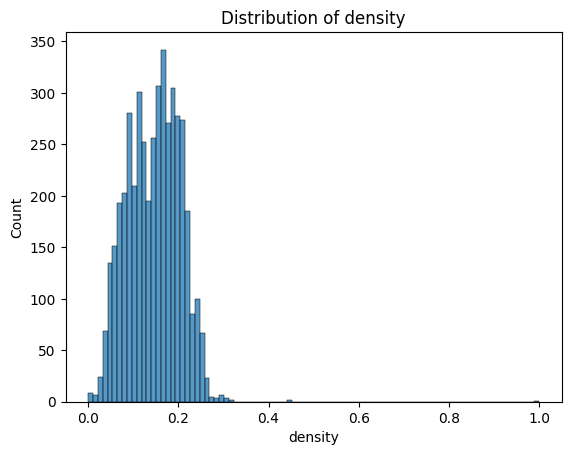

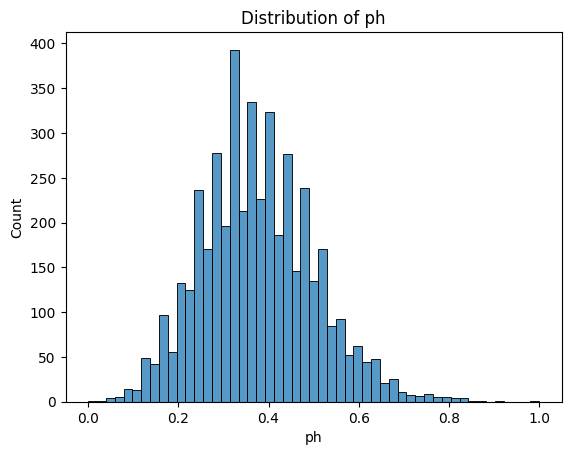

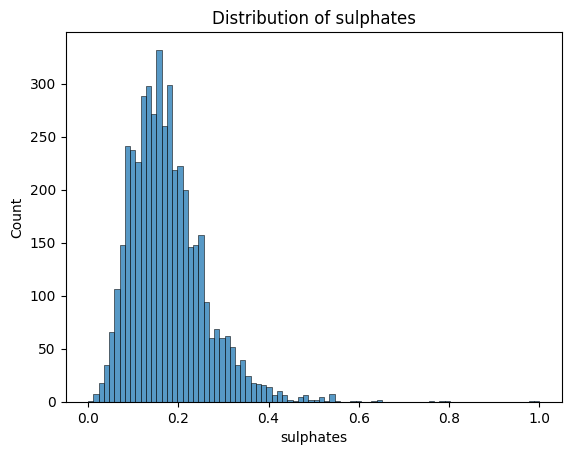

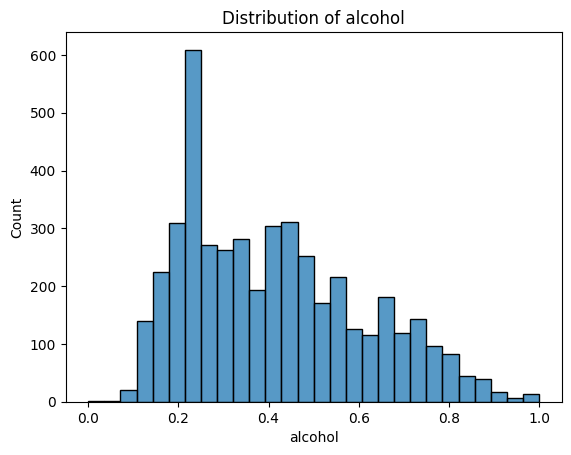

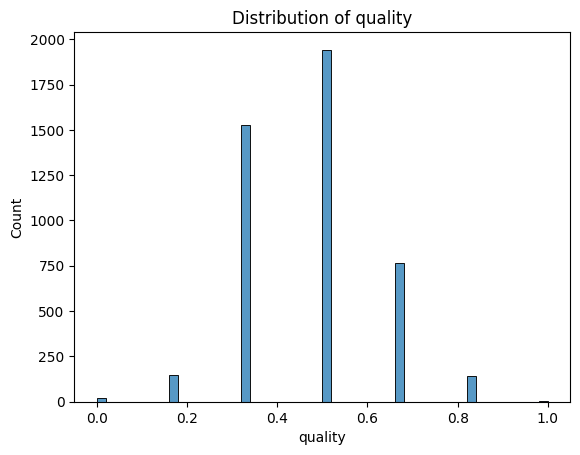

In [27]:
for col in train_scaled.columns[train_scaled.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train_scaled, x=col)
    plt.show()

## created wrangle function below

In [30]:
train, val, test = w.wrangle_wine()

In [31]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
3761,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405,0.500000
3740,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463,0.333333
1359,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088,0.500000
1230,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099,0.500000
4751,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975,0.500000
